<a href="https://colab.research.google.com/github/SWeat-python-weekend-study/JaeHyunLee/blob/main/week4_LeeJaeHyun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 하루 승인 거래 건수 분석

In [91]:
cd sample_data/

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data


In [92]:
pwd

'/content/sample_data'

In [93]:
ls

행정구역_시군구_별__성별_인구수_2011_2020.csv  README.md*
anscombe.json*                                 trns_1day_series.csv
california_housing_test.csv                    trns_firm_info.csv
california_housing_train.csv                   trns_msg_info.csv
mnist_test.csv                                 trns_msg_log.csv
mnist_train_small.csv                          trns_msg_resp_code_info.csv


In [94]:
import pandas as pd
import numpy as np

df = pd.read_csv('trns_1day_series.csv')
df.head()

,SEND,RECV,APPROVAL,REJECT
0,4779,5045,4024,755
1,5103,5055,4196,907
2,5035,5073,4653,382
3,4757,4762,4530,227
4,4639,4664,4425,214


In [95]:
df.describe()

,SEND,RECV,APPROVAL,REJECT
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,10274.082639,10274.831944,10062.034722,212.047917
std,6683.456958,6683.442065,6584.390468,135.078228
min,769.000000,769.000000,714.000000,16.000000
25%,3580.750000,3579.250000,3469.000000,84.000000
50%,11115.000000,11133.500000,10901.500000,210.500000
75%,15745.000000,15729.250000,15451.000000,305.000000
max,24859.000000,24911.000000,24565.000000,907.000000


In [96]:
len(df)

1440

In [97]:
pd.date_range('00:00', '23:59', freq = '1min')

DatetimeIndex(['2021-03-08 00:00:00', '2021-03-08 00:01:00',
               '2021-03-08 00:02:00', '2021-03-08 00:03:00',
               '2021-03-08 00:04:00', '2021-03-08 00:05:00',
               '2021-03-08 00:06:00', '2021-03-08 00:07:00',
               '2021-03-08 00:08:00', '2021-03-08 00:09:00',
               ...
               '2021-03-08 23:50:00', '2021-03-08 23:51:00',
               '2021-03-08 23:52:00', '2021-03-08 23:53:00',
               '2021-03-08 23:54:00', '2021-03-08 23:55:00',
               '2021-03-08 23:56:00', '2021-03-08 23:57:00',
               '2021-03-08 23:58:00', '2021-03-08 23:59:00'],
              dtype='datetime64[ns]', length=1440, freq='T')

In [98]:
df['TIME'] = pd.date_range('00:00', '23:59', freq = '1min')
df = df.set_index('TIME')
df

,SEND,RECV,APPROVAL,REJECT
TIME,,,,
2021-03-08 00:00:00,4779,5045,4024,755
2021-03-08 00:01:00,5103,5055,4196,907
2021-03-08 00:02:00,5035,5073,4653,382
2021-03-08 00:03:00,4757,4762,4530,227
2021-03-08 00:04:00,4639,4664,4425,214
...,...,...,...,...
2021-03-08 23:55:00,5280,5269,5110,170
2021-03-08 23:56:00,5202,5210,5056,146
2021-03-08 23:57:00,5210,5221,5006,204


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


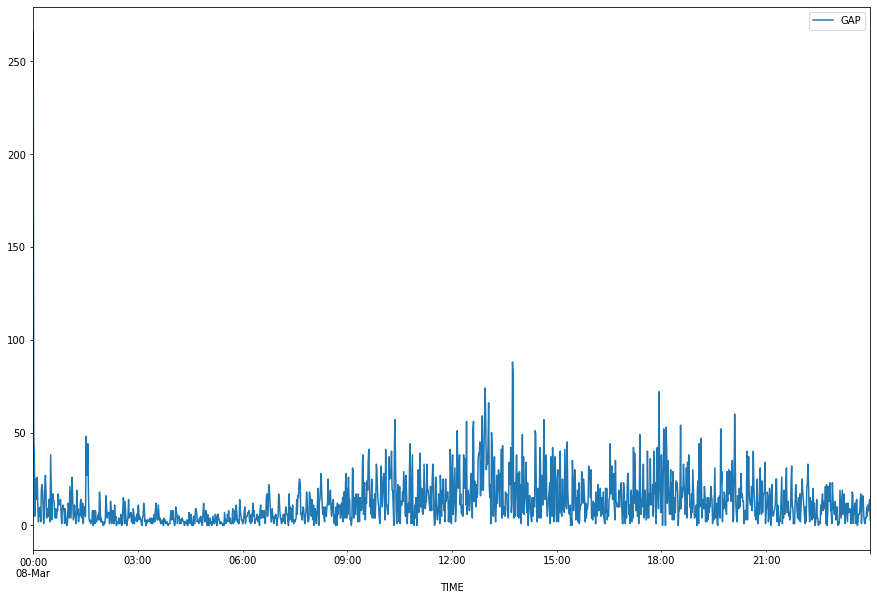

In [99]:
df['GAP'] = np.abs(df.SEND - df.RECV)
df.plot(y = 'GAP')

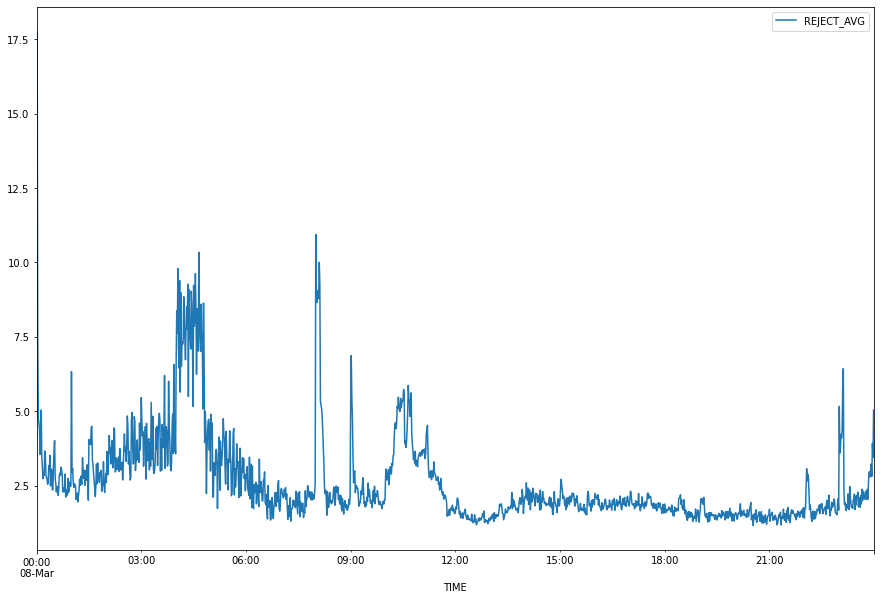

In [100]:
df['REJECT_AVG'] = df.REJECT / (df.APPROVAL + df.REJECT) * 100
df.plot(y = 'REJECT_AVG')

In [101]:
len(df)

1440

In [102]:
np.arange(0, len(df))

array([   0,    1,    2, ..., 1437, 1438, 1439])

In [103]:
np.array(df.APPROVAL)

array([4024, 4196, 4653, ..., 5006, 4935, 4940])

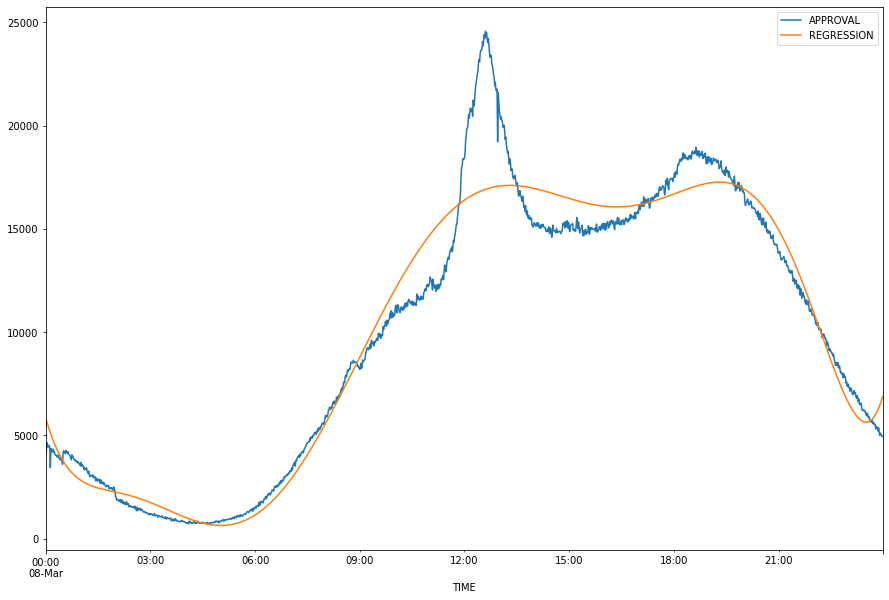

In [104]:
fp = np.polyfit(np.arange(0, len(df)), np.array(df.APPROVAL), 8)
fd = np.poly1d(fp)
df['REGRESSION'] = fd(np.arange(0, len(df)))
df.plot(y = ['APPROVAL', 'REGRESSION'])

In [105]:
((df.APPROVAL - df.REGRESSION) ** 2).sum() / 1440

2289273.532760827

In [106]:
((df.APPROVAL - df.REGRESSION) ** 2).mean() / 1440

1589.7732866394638

In [107]:
mse = ((df.APPROVAL - df.REGRESSION) **2).mean()
rmse = np.sqrt(mse)
rmse, mse

(1513.0345444704255, 2289273.532760828)

In [108]:
hh_list = np.array( df.APPROVAL ).reshape(24, 60) 

In [109]:
hh_list.shape

(24, 60)

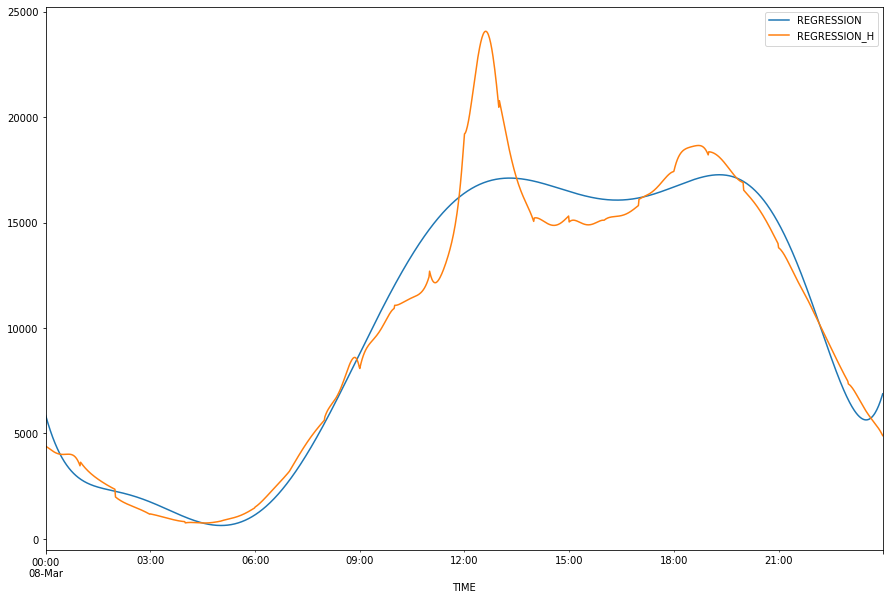

In [110]:
reg_list = []
for mm_list in hh_list: 
  x = np.arange(0, 60) 
  y = mm_list 
  fp = np.polyfit(x, y, 4)
  fn = np.poly1d(fp)
  reg_list.append(fn(x)) 

df['REGRESSION_H'] = np.array(reg_list).flatten()
df.plot(y=['REGRESSION', 'REGRESSION_H'])

2. 전문 거래 로그 분석

In [111]:
log_df = pd.read_csv('trns_msg_log.csv', sep=':', dtype=str)

In [112]:
msg_df = pd.read_csv('trns_msg_info.csv', dtype=str)

In [113]:
firm_df = pd.read_csv('trns_firm_info.csv', dtype=str)

In [114]:
resp_df = pd.read_csv('trns_msg_resp_code_info.csv', dtype=str)

In [115]:
tf1 = pd.merge(log_df, msg_df, on=['MSG_CODE'], how='left')
tf2 = pd.merge(tf1 , firm_df, on=['FIRM_CODE'], how='left')
tf3 = pd.merge(tf2 , resp_df, on=['RESP_CODE'], how='left') 

In [116]:
tf3.loc[tf3.TRNS == '1', 'TRNS'] = 'SEND'
tf3.loc[tf3.TRNS == '2', 'TRNS'] = 'RECV'

In [117]:
send_df = log_df[log_df.TRNS=='1']
recv_df = log_df[log_df.TRNS =='2']

tf = pd.merge(send_df, recv_df, on=['FIRM_CODE', 'SEQ'], how='outer')
tf

,TRNS_x,MSG_CODE_x,TIME_x,RESP_CODE_x,FIRM_CODE,SEQ,TRNS_y,MSG_CODE_y,TIME_y,RESP_CODE_y
0,1,0100,133000,,03,2e65c202e525e90e1d95,2,0110,133005,01
1,1,0300,133000,,48,802407d045fa5d1a8287,2,0310,133001,01
2,1,0200,133000,,03,a1d3e524e4751b450a20,2,0210,133000,01
3,1,0200,133000,,11,ed976e8de9708d167a64,2,0210,133008,00
4,1,9300,133000,,03,b7a878a4ff5d3076dd4b,2,9310,133003,01
...,...,...,...,...,...,...,...,...,...,...
995,1,0420,133059,,03,226c76440f927213fc35,2,0430,133100,00
996,1,0420,133059,,23,4a0813a414e8a43ae594,2,0430,133103,00
997,1,0420,133059,,20,f9951616122039cadea7,2,0430,133108,00
998,1,0420,133059,,72,917057d635b367f53749,2,0430,133107,00


In [118]:
tf = tf [['SEQ', 'FIRM_CODE', 'MSG_CODE_x', 'TIME_x', 'TIME_y','RESP_CODE_y']]
tf = tf.rename(columns={'MSG_CODE_x':'MSG_CODE', 'TIME_x':'SEND_TIME', 'TIME_y':'RECV_TIME', 
'RESP_CODE_y':'RESP_CODE'})
tf

,SEQ,FIRM_CODE,MSG_CODE,SEND_TIME,RECV_TIME,RESP_CODE
0,2e65c202e525e90e1d95,03,0100,133000,133005,01
1,802407d045fa5d1a8287,48,0300,133000,133001,01
2,a1d3e524e4751b450a20,03,0200,133000,133000,01
3,ed976e8de9708d167a64,11,0200,133000,133008,00
4,b7a878a4ff5d3076dd4b,03,9300,133000,133003,01
...,...,...,...,...,...,...
995,226c76440f927213fc35,03,0420,133059,133100,00
996,4a0813a414e8a43ae594,23,0420,133059,133103,00
997,f9951616122039cadea7,20,0420,133059,133108,00
998,917057d635b367f53749,72,0420,133059,133107,00


In [119]:
tf['S_DATETIME'] = pd.to_datetime(tf.SEND_TIME, format='%H%M%S')
tf['R_DATETIME'] = pd.to_datetime(tf.RECV_TIME, format='%H%M%S')
tf

,SEQ,FIRM_CODE,MSG_CODE,SEND_TIME,RECV_TIME,RESP_CODE,S_DATETIME,R_DATETIME
0,2e65c202e525e90e1d95,03,0100,133000,133005,01,1900-01-01 13:30:00,1900-01-01 13:30:05
1,802407d045fa5d1a8287,48,0300,133000,133001,01,1900-01-01 13:30:00,1900-01-01 13:30:01
2,a1d3e524e4751b450a20,03,0200,133000,133000,01,1900-01-01 13:30:00,1900-01-01 13:30:00
3,ed976e8de9708d167a64,11,0200,133000,133008,00,1900-01-01 13:30:00,1900-01-01 13:30:08
4,b7a878a4ff5d3076dd4b,03,9300,133000,133003,01,1900-01-01 13:30:00,1900-01-01 13:30:03
...,...,...,...,...,...,...,...,...
995,226c76440f927213fc35,03,0420,133059,133100,00,1900-01-01 13:30:59,1900-01-01 13:31:00
996,4a0813a414e8a43ae594,23,0420,133059,133103,00,1900-01-01 13:30:59,1900-01-01 13:31:03
997,f9951616122039cadea7,20,0420,133059,133108,00,1900-01-01 13:30:59,1900-01-01 13:31:08
998,917057d635b367f53749,72,0420,133059,133107,00,1900-01-01 13:30:59,1900-01-01 13:31:07


In [120]:
tf['TIME_GAP'] = tf.R_DATETIME - tf.S_DATETIME

In [121]:
tf = tf.drop(['S_DATETIME','R_DATETIME'], axis=1)
tf

,SEQ,FIRM_CODE,MSG_CODE,SEND_TIME,RECV_TIME,RESP_CODE,TIME_GAP
0,2e65c202e525e90e1d95,03,0100,133000,133005,01,0 days 00:00:05
1,802407d045fa5d1a8287,48,0300,133000,133001,01,0 days 00:00:01
2,a1d3e524e4751b450a20,03,0200,133000,133000,01,0 days 00:00:00
3,ed976e8de9708d167a64,11,0200,133000,133008,00,0 days 00:00:08
4,b7a878a4ff5d3076dd4b,03,9300,133000,133003,01,0 days 00:00:03
...,...,...,...,...,...,...,...
995,226c76440f927213fc35,03,0420,133059,133100,00,0 days 00:00:01
996,4a0813a414e8a43ae594,23,0420,133059,133103,00,0 days 00:00:04
997,f9951616122039cadea7,20,0420,133059,133108,00,0 days 00:00:09
998,917057d635b367f53749,72,0420,133059,133107,00,0 days 00:00:08


In [122]:
tf['SEC_GAP'] = tf['TIME_GAP'].dt.seconds
tf['COUNT'] = 1
tf

,SEQ,FIRM_CODE,MSG_CODE,SEND_TIME,RECV_TIME,RESP_CODE,TIME_GAP,SEC_GAP,COUNT
0,2e65c202e525e90e1d95,03,0100,133000,133005,01,0 days 00:00:05,5,1
1,802407d045fa5d1a8287,48,0300,133000,133001,01,0 days 00:00:01,1,1
2,a1d3e524e4751b450a20,03,0200,133000,133000,01,0 days 00:00:00,0,1
3,ed976e8de9708d167a64,11,0200,133000,133008,00,0 days 00:00:08,8,1
4,b7a878a4ff5d3076dd4b,03,9300,133000,133003,01,0 days 00:00:03,3,1
...,...,...,...,...,...,...,...,...,...
995,226c76440f927213fc35,03,0420,133059,133100,00,0 days 00:00:01,1,1
996,4a0813a414e8a43ae594,23,0420,133059,133103,00,0 days 00:00:04,4,1
997,f9951616122039cadea7,20,0420,133059,133108,00,0 days 00:00:09,9,1
998,917057d635b367f53749,72,0420,133059,133107,00,0 days 00:00:08,8,1


In [123]:
tf.groupby('SEC_GAP').sum()

,COUNT
SEC_GAP,
0,91
1,96
2,112
3,96
4,99
5,106
6,99
7,94
8,104


SEC_GAP
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

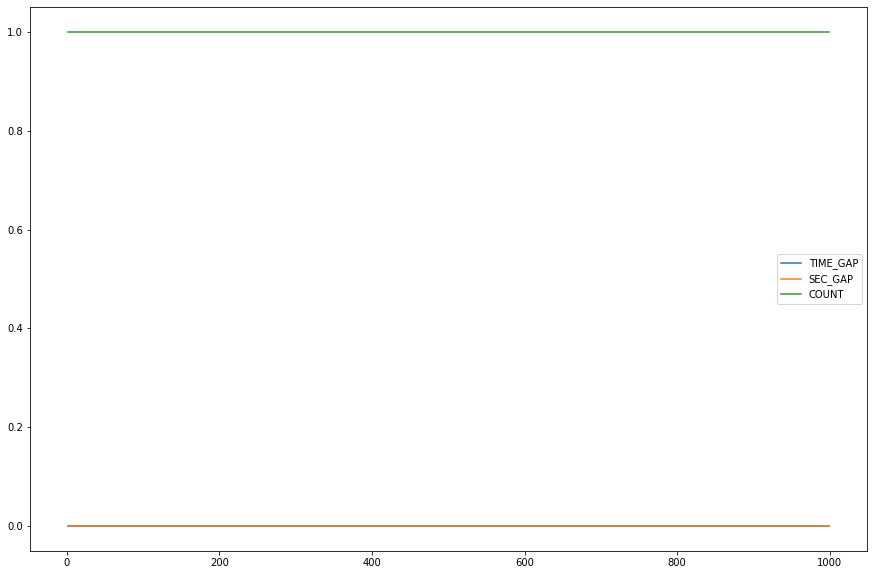

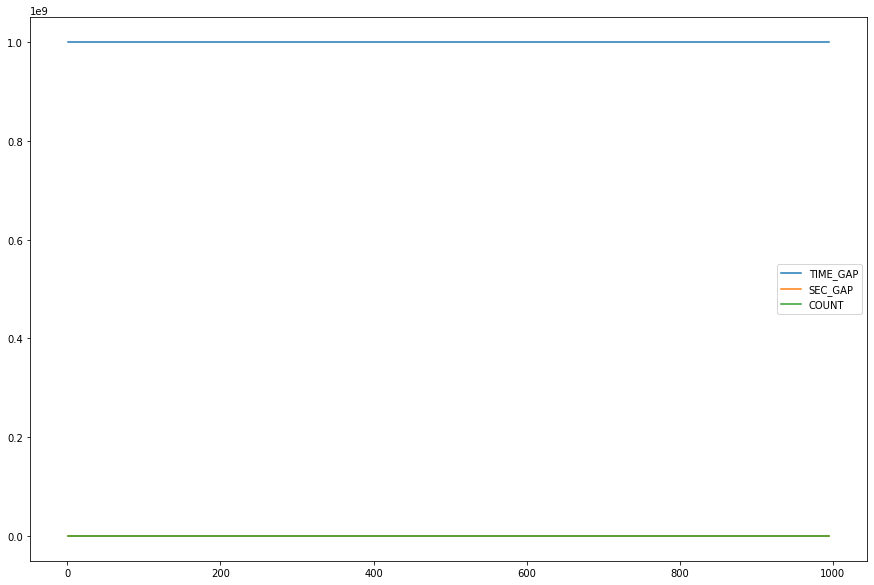

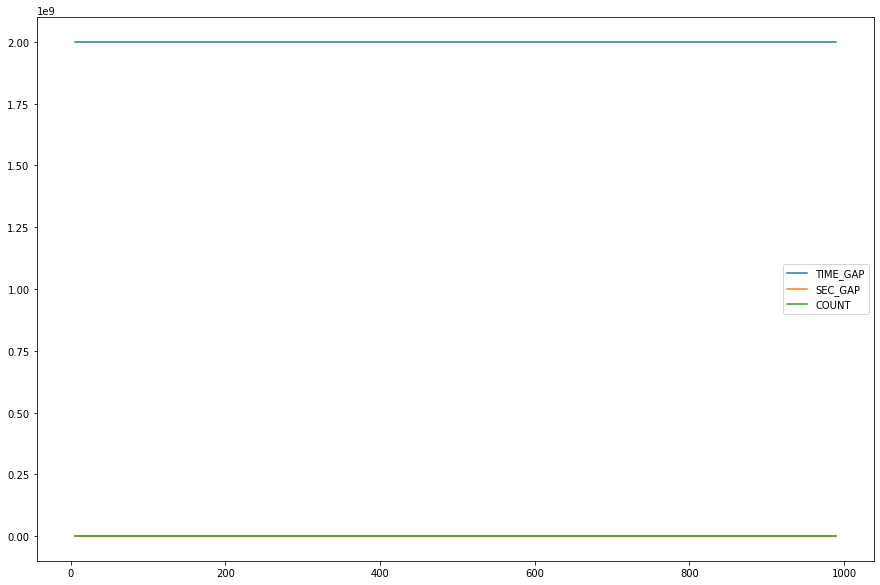

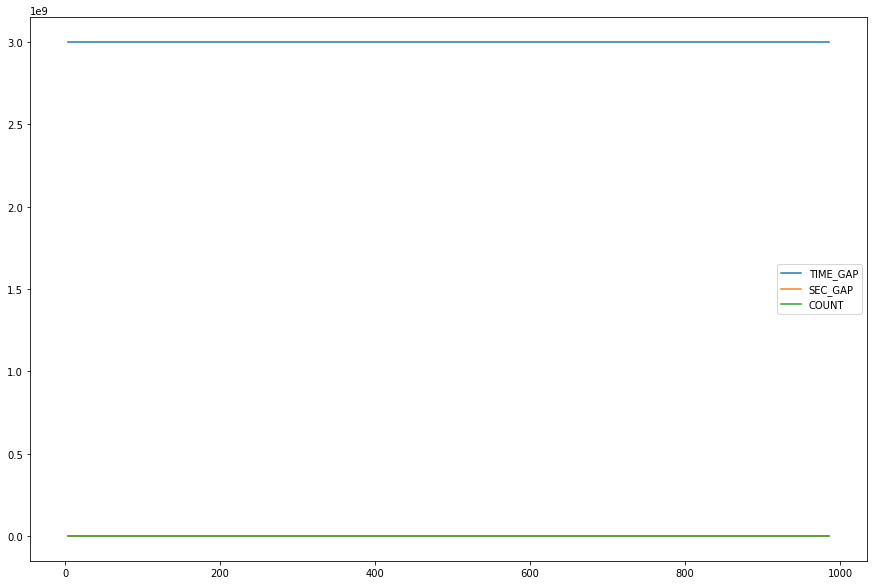

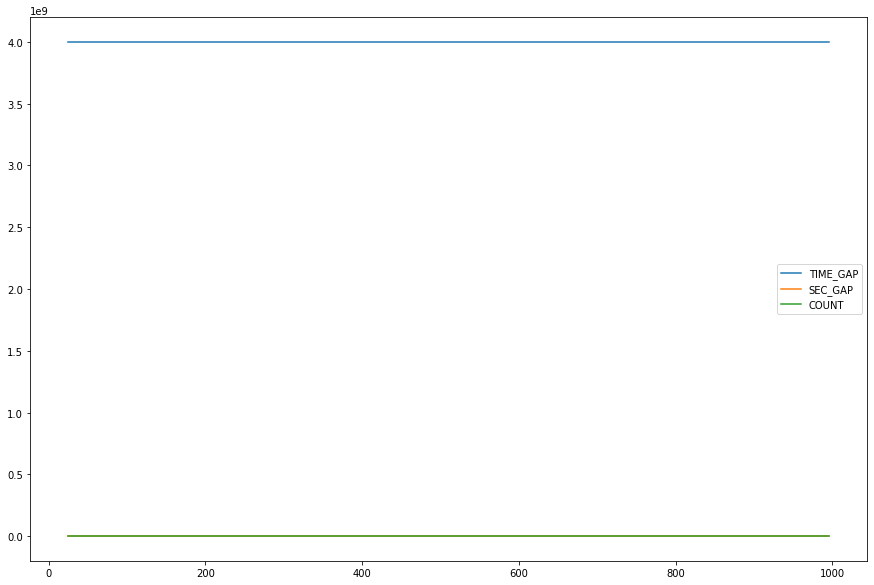

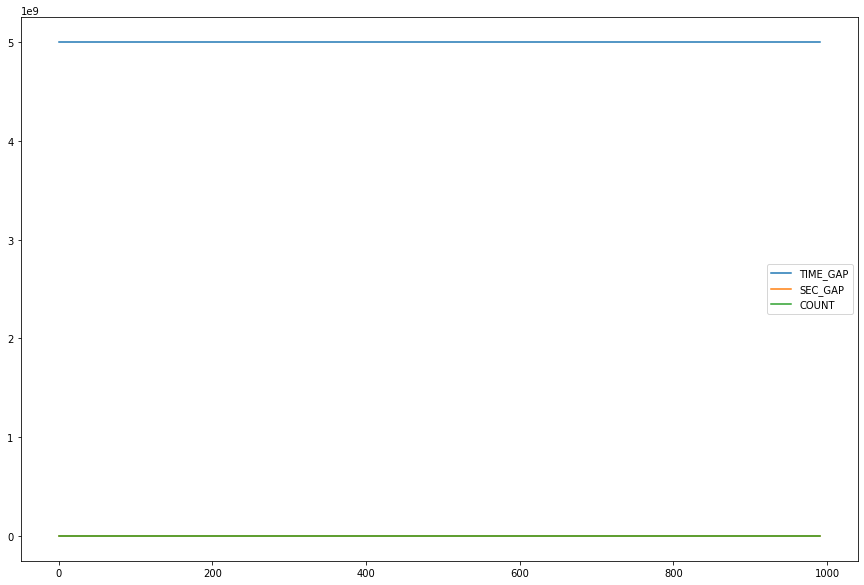

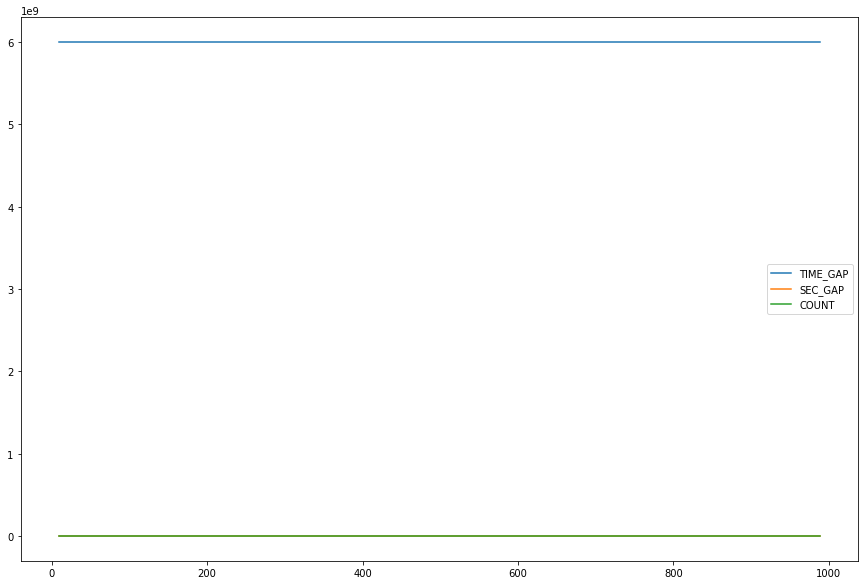

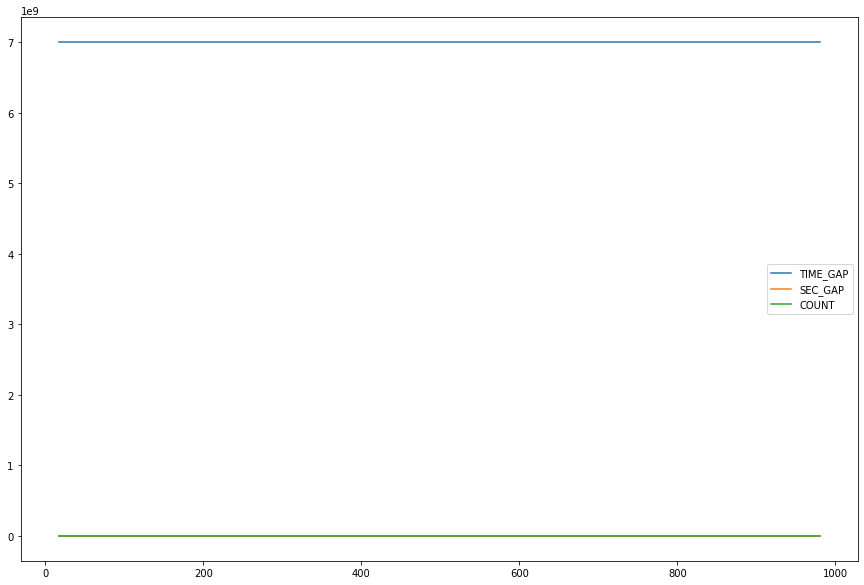

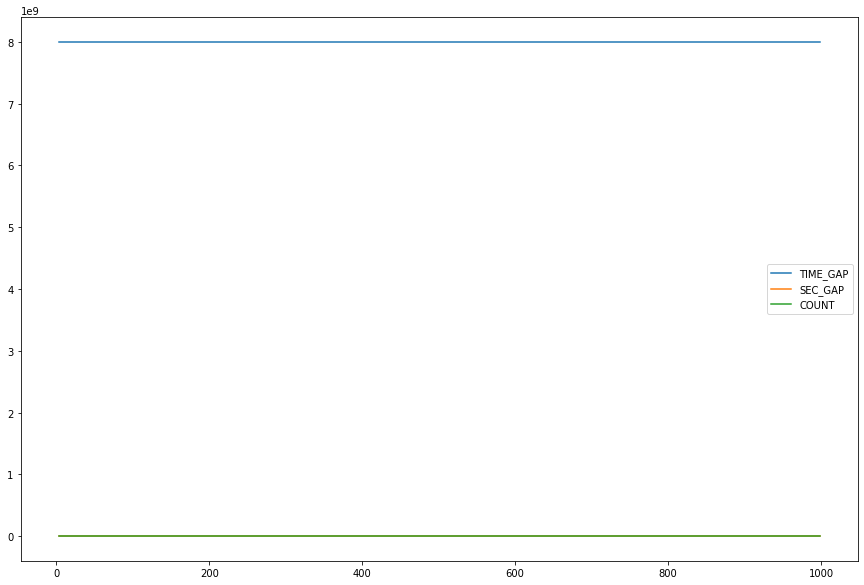

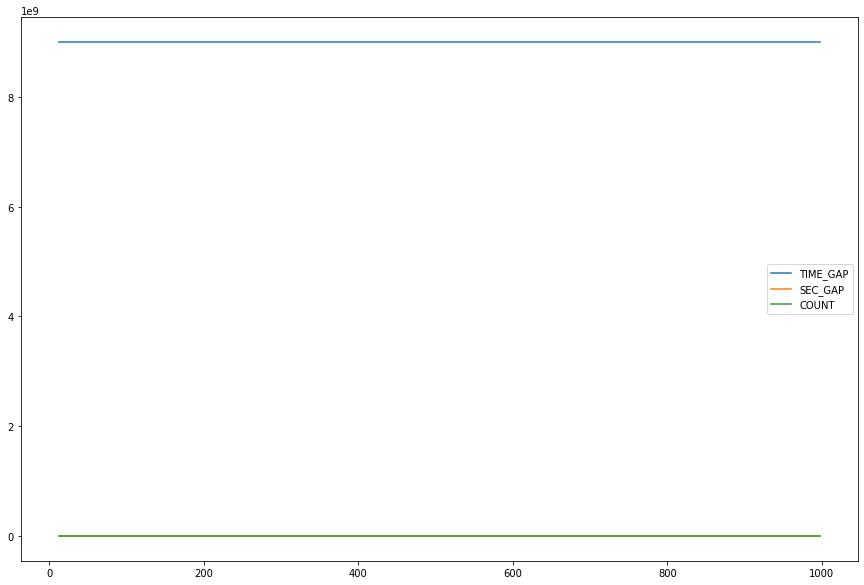

In [124]:
df = tf.groupby('SEC_GAP') 
df.plot()

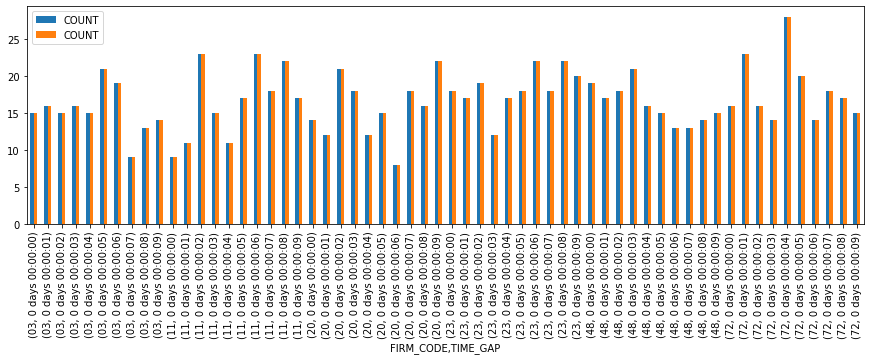

In [125]:
tf.groupby(['FIRM_CODE','TIME_GAP']).count()
tf.groupby(['FIRM_CODE','TIME_GAP']).count().rename(columns={'SEQ':'COUNT'})
tf.groupby(['FIRM_CODE','TIME_GAP']).count().rename(columns={'SEQ':'COUNT'}) [['COUNT']]
df = tf.groupby(['FIRM_CODE', 'TIME_GAP']).count().rename(columns={'SEQ':'COUNT'}) [['COUNT']]
df.plot(kind='bar', figsize=(15,4))

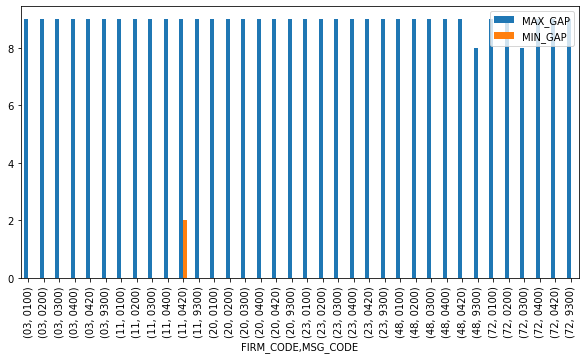

In [126]:
zf = tf[['FIRM_CODE','MSG_CODE','TIME_GAP']] 
max_df = zf.groupby(['FIRM_CODE','MSG_CODE']).max().rename(columns={'TIME_GAP':'MAX_GAP'})
min_df = zf.groupby(['FIRM_CODE','MSG_CODE']).min().rename(columns={'TIME_GAP':'MIN_GAP'})
max_df = max_df.reset_index() 
min_df = min_df.reset_index() 
df = pd.merge(max_df, min_df)
df['MAX_GAP'] = df.MAX_GAP.dt.seconds 
df['MIN_GAP'] = df.MIN_GAP.dt.seconds 
df.set_index(['FIRM_CODE','MSG_CODE']).plot(kind='bar', figsize=(10,5))

3. 행정구역별 인구변화 분석

In [127]:
%matplotlib inline
import pandas as pd
from matplotlib import rcParams
rcParams['font.sans-serif'] = 'Malgun Gothic'
rcParams['font.weight']='regular'
rcParams['figure.figsize'] = 15,10

In [128]:
df = pd.read_csv('행정구역_시군구_별__성별_인구수_2011_2020.csv', header=[0,1], index_col=0, encoding = 'UTF-8')
df.head()

UnicodeDecodeError: ignored

In [ ]:
for _ in df.columns:
  print(_)

In [ ]:
for x in df.columns:
  print( [_.replace(' ','').replace('(명)','') for _ in x ] )

In [ ]:
colset = {}
for x in df.columns:
  y = [ _.replace(' ','').replace('(명)','') for _ in x ]
  colset[x] = tuple(y) 
colset


In [ ]:
df.columns = df.columns.values

In [ ]:
df = df.rename(columns=colset)
df.head()

In [ ]:
df.columns = pd.MultiIndex.from_tuples(df.columns)

In [ ]:
tf = df.T
tf

In [ ]:
tf = tf.unstack()

In [ ]:
tf.plot()

In [ ]:
tf['서울특별시'].plot()

In [ ]:
tf['세종특별자치시'].plot()